In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shobika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
amz=pd.read_csv("status_text.csv")
amz.sample(5)

,status_text
270,--Action plan--????1.?Spark plug tubes are goi...
1049,Flag for ME to review during slow build.
1112,Closed after completing quality cross referenc...
375,ICA Implemented By changed from [no previous v...
674,"[CFT, 7/24/15] Agreed to close based on Suppl..."


In [3]:
amz.status_text.isna().sum()

0

In [4]:
amz.status_text[(amz.status_text.str.len() == 0) | (amz.status_text == "")].shape[0]

0

In [5]:
print("Dimensions of dataset before dropping the NAs:",amz.shape)
amz = amz.dropna(subset=['status_text'])
print("Dimensions of dataset after dropping the NAs:",amz.shape)

Dimensions of dataset before dropping the NAs: (1211, 1)
Dimensions of dataset after dropping the NAs: (1211, 1)


In [8]:
d=dict()
corpus = []
stop_words = set(stopwords.words("english"))
for i in range(1,len(amz)):
    status_text = re.sub('[^a-zA-Z]', ' ', amz['status_text'][i])
    status_text = status_text.lower()
    status_text = status_text.split()
    for word in status_text:
        if (len(word)<6):
            if word in d:
                d[word] = d[word] + 1
            else:
                d[word] = 1
    ps = PorterStemmer()
    status_text = [ps.stem(word) for word in status_text
                if not word in set(stopwords.words('english'))]
    status_text = ' '.join(status_text) 
    corpus.append(status_text)
dope = dict((k, v) for k, v in d.items() if v >= 20)

marklist = sorted(dope.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)
for key,val in sortdict.items(): 
    print(key, ' : ', val)
amz.head()

to  :  1407
the  :  894
from  :  517
and  :  465
for  :  432
issue  :  392
of  :  373
no  :  366
with  :  359
on  :  324
be  :  308
is  :  301
in  :  273
value  :  232
will  :  230
a  :  222
by  :  220
this  :  218
that  :  169
as  :  158
pca  :  158
at  :  153
not  :  151
date  :  135
pd  :  125
ica  :  125
l  :  124
was  :  119
m  :  118
have  :  110
parts  :  108
are  :  102
has  :  100
we  :  97
d  :  93
per  :  83
new  :  81
me  :  81
aims  :  80
part  :  76
p  :  73
been  :  73
test  :  71
see  :  70
team  :  70
build  :  69
s  :  67
ford  :  65
up  :  63
need  :  61
can  :  61
if  :  61
gm  :  61
close  :  61
added  :  58
data  :  58
all  :  57
pfi  :  54
model  :  53
oil  :  53
an  :  51
type  :  50
it  :  49
aim  :  49
due  :  47
after  :  47
head  :  47
hole  :  44
may  :  43
next  :  43
were  :  42
lead  :  42
still  :  42
plan  :  41
there  :  40
cam  :  40
e  :  40
mm  :  40
out  :  39
c  :  39
vp  :  38
year  :  37
nano  :  37
when  :  37
i  :  37
cause  :  36
g  :  36
or

,status_text
0,"Lead Vehicle - Model Year changed from ""Nano 2..."
1,EK awaiting lab results (micrographs).
2,Lab results returned and reviewing on 29-Jan.
3,Results from lab show that no contamination or...
4,EK running additional FEA modeling. Looking a...


In [9]:
corpus[0:10]

['ek await lab result micrograph',
 'lab result return review jan',
 'result lab show contamin degrad materi found analysi return part meet current spec stress side wall crack area also low therefor crack come applic load cover addit test ongo determin root caus see new attach',
 'ek run addit fea model look flat skew effect could gener extra stress caus crack discuss tardi close pend issu hope expedi futur',
 'result present ek show low level warpag flat stress near crack area increas run fea higher level warpag see attach',
 'attach need get addit flat test result well implement date correct action flat end line test product process',
 'attach updat pca implement mold cover product tool windag cut meet part flat requir prototyp part use build addit fea analysi show crack result area due flat twist load bolt recommend move pend',
 'ad final supplier issu close root caus free state flat specif due prototyp mold part print',
 'close supplier final issu found prototyp part correct produc

In [20]:
vectorizer = CountVectorizer(stop_words='english')
#converting toarrray() to get a dense matrix
V_s = vectorizer.fit_transform(corpus).toarray()
# vectorizer = TfidfVectorizer()
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
# X = vectorizer.fit_transform(corpus).toarray()

C:\Users\Shobika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


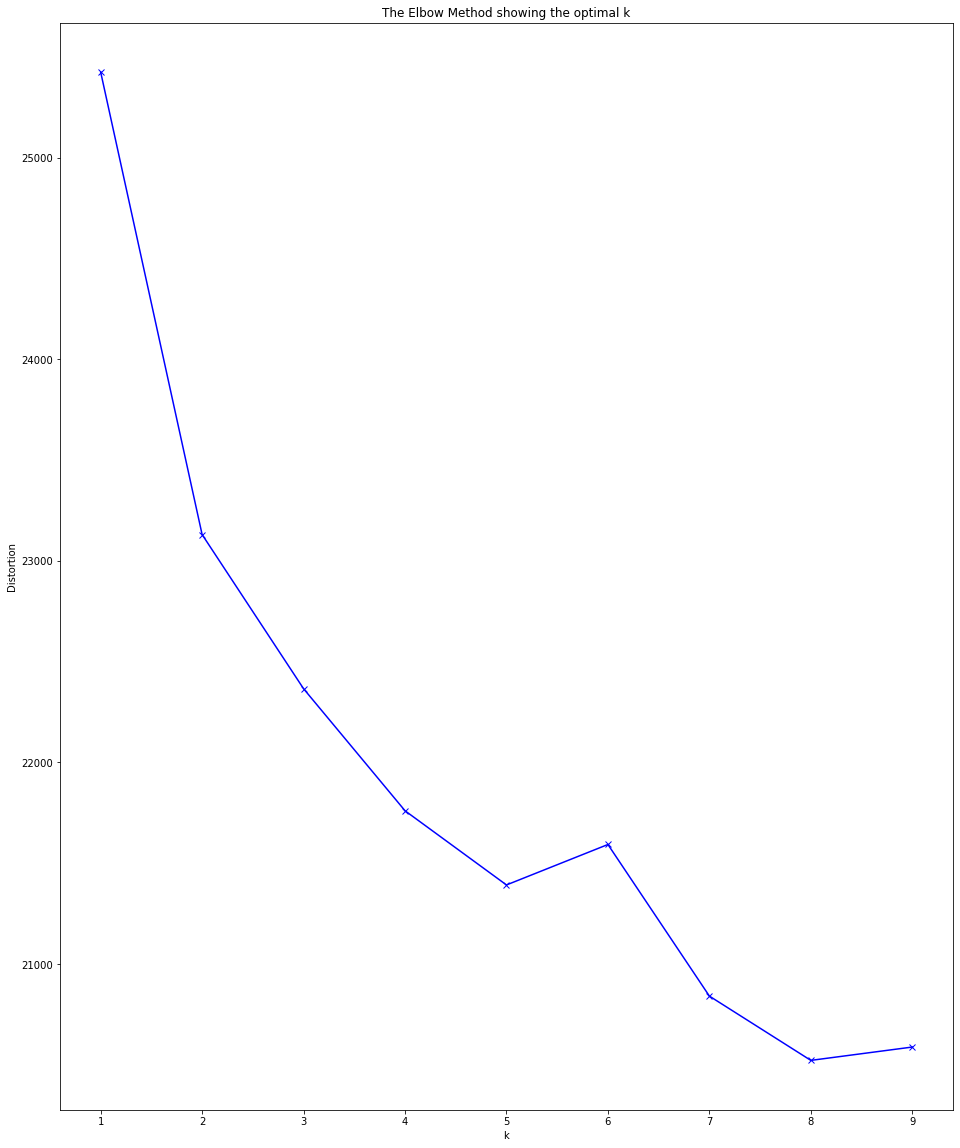

In [23]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(V_s)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,20))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

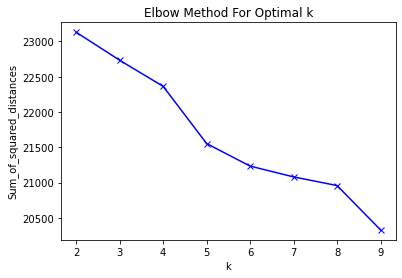

How many clusters do you want to use?
8
Empty DataFrame
Columns: [status_text, cluster]
Index: []
Empty DataFrame
Columns: [status_text, cluster]
Index: []
   status_text  cluster
0            r        2
1            e        2
2            s        2
3            p        2
4            o        2
5            n        2
6            s        2
7                     2
8            m        2
9            a        2
10           n        2
11           u        2
12           f        2
13           a        2
14           c        2
15           t        2
16           u        2
17           r        2
18                    2
19           t        2
20           e        2
21           a        2
22           m        2
23                    2
24           a        2
25           t        2
26           t        2
27           a        2
28           c        2
29           h        2
30                    2
31           d        2
32           e        2
33           t        2
34  

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(V_s)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print('How many clusters do you want to use?')
true_k = int(input())
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(V_s)

labels=model.labels_
clusters=pd.DataFrame(list(zip(status_text,labels)),columns=['status_text','cluster'])
#print(clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(clusters[clusters['cluster'] == i])

In [25]:
def idf_transform(word_col):
    #words present in how many documents - df
    w = len(word_col[np.nonzero(word_col)])
    #compute idf for a word
    return np.log(len(word_col)/(w + 1))

def tf_idf(bow):
    #TF matrix
    tf = np.log(bow + 1)
    #1d array
    idf = np.apply_along_axis(idf_transform,0,bow)
    #tf-idf
    return (np.multiply(tf,idf))

In [26]:
X = tf_idf(V_s)

In [27]:
def kmeans(V,k):
    #select k reviews as centers
    k_center_i = random.sample(range(0,V.shape[0]),k)
    center_v = V[k_center_i, :]
    
    #all reviews
    A_i = np.array([x for x in range(0,V.shape[0])])
    all_v_norm = np.apply_along_axis(np.linalg.norm,1,V)
    
    #clusters - initial
    clusters = [None] * k
    clusters[0] = A_i.tolist()
    for i in range(1,k):
        clusters[i] = []
    j=0
    while True:
        
        print(j)
        for i in range(0,len(clusters)):
            print('cluster',i,len(clusters[i]))
#         #only printing the sizes of first 4 clusters
#         print("iteration",j,"cluster0",len(clusters[0]),"cluster1",len(clusters[1]),"cluster2",len(clusters[2]),
#               "clusters3",len(clusters[3]))
        #Norm of cluster center vectors
        center_v_norm = np.apply_along_axis(np.linalg.norm,1,center_v)
        #Cosine similarity: 
        #x @ y
        product_v = V @ np.transpose(center_v)
        #divide by norms ||x|| and ||y||
        product_v_n = np.apply_along_axis(np.true_divide,1,product_v,center_v_norm)
        product_v_norm = np.apply_along_axis(np.true_divide,0,product_v_n,all_v_norm)
        #get each review has maximum cosine similarity with which center
        max_center = np.argmax(product_v,axis=1)

        #assign to closest clusters
        clusters_new = [None] * k
        for i in range(k):
            r = np.where(np.array(max_center) == i)
            clusters_new[i] = r[0].tolist()

        if (np.array_equal(clusters,clusters_new)):
            break
        else:
            j = j+1
        
        #calculate new centers
        for i in range(k):
            reviews = V[clusters_new[i], :]
            center_v[i] = np.mean(reviews,axis=0)
        
        #set old clusters as new clusters
        clusters = clusters_new.copy()
    
    print("Clusters converged after",j+1,"iterations")
    return clusters

In [28]:
clusters = kmeans(X,8)

0
cluster 0 1210
cluster 1 0
cluster 2 0
cluster 3 0
cluster 4 0
cluster 5 0
cluster 6 0
cluster 7 0
1
cluster 0 274
cluster 1 36
cluster 2 19
cluster 3 8
cluster 4 18
cluster 5 179
cluster 6 100
cluster 7 576
2
cluster 0 122
cluster 1 128
cluster 2 73
cluster 3 220
cluster 4 36
cluster 5 234
cluster 6 110
cluster 7 287
3
cluster 0 126
cluster 1 151
cluster 2 85
cluster 3 169
cluster 4 50
cluster 5 233
cluster 6 112
cluster 7 284
4
cluster 0 120
cluster 1 155
cluster 2 91
cluster 3 174
cluster 4 61
cluster 5 230
cluster 6 109
cluster 7 270
5
cluster 0 122
cluster 1 161
cluster 2 96
cluster 3 173
cluster 4 65
cluster 5 230
cluster 6 104
cluster 7 259
6
cluster 0 122
cluster 1 170
cluster 2 97
cluster 3 174
cluster 4 67
cluster 5 229
cluster 6 102
cluster 7 249
7
cluster 0 122
cluster 1 178
cluster 2 97
cluster 3 174
cluster 4 69
cluster 5 229
cluster 6 101
cluster 7 240
8
cluster 0 122
cluster 1 183
cluster 2 96
cluster 3 172
cluster 4 70
cluster 5 229
cluster 6 100
cluster 7 238
9
clus

C:\Users\Shobika\anaconda3\lib\site-packages\numpy\core\numeric.py:2440: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)


In [ ]:
for i in range(0,len(clusters)):
    print(amz.iloc[clusters[i]][['status_text']].sample(7))